In [1]:
import pandas as pd
import numpy as np
import scipy
import os
import os.path
from matplotlib import cm
from IPython.display import display, HTML

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import calendar

df = pd.read_csv("Data/ava.csv")

In [2]:
df = df.drop(["Unnamed: 0"], axis = 1)
df.head()

,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br
0,359,2016-11-12,2016-12-06,1,25,2016-11-12,1,36.11,68.375941,16.081958
1,359,2016-11-12,2016-12-06,1,25,2016-11-13,2,35.70,67.499289,15.681856
2,359,2016-11-12,2016-12-06,1,25,2016-11-14,3,35.38,63.632920,15.381588
3,359,2016-11-12,2016-12-06,1,25,2016-11-15,4,35.64,66.366427,15.448914
4,359,2016-11-12,2016-12-06,1,25,2016-11-16,5,35.87,66.680990,15.823407


In [3]:
#Create a new function:
def num_missing(x):
    return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
#print("\nMissing values per row:")
#print(df.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row

Missing values per column:
user                 0
first_date           0
last_date            0
cycle_number         0
cycle_length         0
date                 0
cycle_day            0
skin_temperature    16
hr                  16
br                   9
dtype: int64


### work only without NaNs

In [4]:
df = df.dropna(axis = 0)

In [5]:
print("Missing values per column:")
print(df.apply(num_missing, axis=0))

Missing values per column:
user                0
first_date          0
last_date           0
cycle_number        0
cycle_length        0
date                0
cycle_day           0
skin_temperature    0
hr                  0
br                  0
dtype: int64


In [6]:
print("number of users: ", len(df["user"].unique()))
print("number of cycles: ", len(df.groupby(["user","cycle_number"]).describe()))

number of users:  180
number of cycles:  792


data.loc[(data["Gender"]=="Female") & (data["Education"]=="Not Graduate") & (data["Loan_Status"]=="Y"), ["Gender","Education","Loan_Status"]]

### normalisation / standardisation of features -> df2

In [7]:
#### cycle index for all women
df2 = df.reset_index()
#create a new column for indexing all cycles
df2["cycle_index"] = df2.index

#normalize features hr, br, and skin_temperature
#create new columns for normalized values


cycle_index = []
br_norm = []
hr_norm = []
st_norm = []

br_stan = []
hr_stan = []
st_stan = []

#cycle_index number
i = 0
for user in df2.user.unique():
    for cycle in df2[df2.user == user]["cycle_number"].unique():
        print("user: ", user)
        print("cycle: ", cycle)
        print(i)
        
        # j... length of cycle
        for j in range(len(df2[(df2.user == user)&(df2.cycle_number == cycle)])):
            #print("j:",j)
            cycle_index.append(i)
            #print(cycle_index)
        i+=1        

        df_temp = df2[(df2.user == user)&(df2.cycle_number == cycle)][["skin_temperature", "hr", "br"]]
        #print(df_temp)
        st_norm_temp = (df_temp["skin_temperature"]-df_temp["skin_temperature"].mean())\
                                       /df_temp["skin_temperature"].std()
        hr_norm_temp = (df_temp["hr"]-df_temp["hr"].mean()) /df_temp["hr"].std()
        br_norm_temp = (df_temp["br"]-df_temp["br"].mean())/df_temp["br"].std()
        
        st_stan_temp = (df_temp["skin_temperature"]-df_temp["skin_temperature"].min()) \
        /(df_temp["skin_temperature"].max()-df_temp["skin_temperature"].min())
        hr_stan_temp = (df_temp["hr"]-df_temp["hr"].min()) /(df_temp["hr"].max()-df_temp["hr"].min())
        br_stan_temp = (df_temp["br"]-df_temp["br"].min()) /(df_temp["br"].max()-df_temp["br"].min())
        
        ## append normalized values to list
        st_norm.extend(st_norm_temp.values.tolist())
        br_norm.extend(br_norm_temp.values.tolist())
        hr_norm.extend(hr_norm_temp.values.tolist())
        
        st_stan.extend(st_stan_temp.values.tolist())
        br_stan.extend(br_stan_temp.values.tolist())
        hr_stan.extend(hr_stan_temp.values.tolist())

        
#fill columns with list values
df2["cycle_index"] = cycle_index
df2["br_norm"] = br_norm
df2["hr_norm"] = hr_norm
df2["st_norm"] = st_norm

df2["br_stan"] = br_stan
df2["hr_stan"] = hr_stan
df2["st_stan"] = st_stan

#print(df2[df2.cycle_index ==110])

user:  359
cycle:  1
0
user:  359
cycle:  2
1
user:  359
cycle:  3
2
user:  360
cycle:  1
3
user:  360
cycle:  2
4
user:  360
cycle:  3
5
user:  360
cycle:  4
6
user:  360
cycle:  5
7
user:  360
cycle:  6
8
user:  360
cycle:  7
9
user:  360
cycle:  8
10
user:  360
cycle:  9
11
user:  395
cycle:  1
12
user:  395
cycle:  2
13
user:  402
cycle:  1
14
user:  402
cycle:  2
15
user:  402
cycle:  3
16
user:  406
cycle:  1
17
user:  406
cycle:  2
18
user:  406
cycle:  3
19
user:  406
cycle:  4
20
user:  406
cycle:  5
21
user:  406
cycle:  6
22
user:  406
cycle:  7
23
user:  406
cycle:  8
24
user:  406
cycle:  9
25
user:  406
cycle:  10
26
user:  406
cycle:  11
27
user:  406
cycle:  12
28
user:  406
cycle:  13
29
user:  406
cycle:  14
30
user:  407
cycle:  1
31
user:  407
cycle:  2
32
user:  407
cycle:  3
33
user:  407
cycle:  4
34
user:  407
cycle:  5
35
user:  407
cycle:  6
36
user:  407
cycle:  7
37
user:  407
cycle:  8
38
user:  407
cycle:  9
39
user:  407
cycle:  10
40
user:  407
cycle:  1

cycle:  9
363
user:  2759
cycle:  10
364
user:  2760
cycle:  1
365
user:  2760
cycle:  2
366
user:  2760
cycle:  3
367
user:  2760
cycle:  4
368
user:  2760
cycle:  5
369
user:  2760
cycle:  6
370
user:  2760
cycle:  7
371
user:  2760
cycle:  8
372
user:  2760
cycle:  9
373
user:  2760
cycle:  10
374
user:  2762
cycle:  1
375
user:  2762
cycle:  2
376
user:  2763
cycle:  1
377
user:  2763
cycle:  2
378
user:  2767
cycle:  1
379
user:  2767
cycle:  2
380
user:  2767
cycle:  3
381
user:  2767
cycle:  4
382
user:  2767
cycle:  5
383
user:  2767
cycle:  6
384
user:  2767
cycle:  7
385
user:  2767
cycle:  8
386
user:  2767
cycle:  9
387
user:  2768
cycle:  1
388
user:  2770
cycle:  1
389
user:  2770
cycle:  2
390
user:  2770
cycle:  3
391
user:  2770
cycle:  4
392
user:  2770
cycle:  5
393
user:  2786
cycle:  1
394
user:  2787
cycle:  1
395
user:  2787
cycle:  2
396
user:  2787
cycle:  3
397
user:  2787
cycle:  4
398
user:  2787
cycle:  5
399
user:  2787
cycle:  6
400
user:  2787
cycle:  7


In [8]:
df2[df2.user == 436]

,index,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br,cycle_index,br_norm,hr_norm,st_norm,br_stan,hr_stan,st_stan
2874,2877,436,2016-10-24,2016-11-18,1,26,2016-10-24,1,35.400000,49.706586,13.486290,105,2.537878,-0.544913,-0.316656,1.000000,0.532231,0.328212
2875,2878,436,2016-10-24,2016-11-18,1,26,2016-10-25,2,35.129300,49.173832,12.637855,105,0.780379,-0.883930,-1.097280,0.571176,0.437673,0.041024
2876,2879,436,2016-10-24,2016-11-18,1,26,2016-10-26,3,35.170000,49.142977,12.228836,105,-0.066887,-0.903565,-0.979913,0.364446,0.432197,0.084203
2877,2880,436,2016-10-24,2016-11-18,1,26,2016-10-27,4,35.400000,48.656188,12.565434,105,0.630361,-1.213333,-0.316656,0.534572,0.345798,0.328212
2878,2881,436,2016-10-24,2016-11-18,1,26,2016-10-28,5,35.400000,46.707898,12.109063,105,-0.314993,-2.453124,-0.316656,0.303909,0.000000,0.328212
2879,2882,436,2016-10-24,2016-11-18,1,26,2016-10-29,6,35.400000,49.364914,12.468394,105,0.429346,-0.762335,-0.316656,0.485525,0.471588,0.328212
2880,2883,436,2016-10-24,2016-11-18,1,26,2016-10-30,7,35.197548,47.418725,12.712636,105,0.935285,-2.000790,-0.900473,0.608972,0.126163,0.113428
2881,2884,436,2016-10-24,2016-11-18,1,26,2016-10-31,8,35.140635,47.927818,12.659633,105,0.825491,-1.676829,-1.064593,0.582183,0.216521,0.053049
2882,2885,436,2016-10-24,2016-11-18,1,26,2016-11-01,9,35.336480,50.411311,12.625136,105,0.754031,-0.096462,-0.499832,0.564747,0.657311,0.260823
2883,2886,436,2016-10-24,2016-11-18,1,26,2016-11-02,10,35.248980,51.849442,12.855021,105,1.230230,0.818691,-0.752156,0.680938,0.912562,0.167993


In [9]:

print("Missing values per column:")
print(df2.apply(num_missing, axis=0))

Missing values per column:
index               0
user                0
first_date          0
last_date           0
cycle_number        0
cycle_length        0
date                0
cycle_day           0
skin_temperature    0
hr                  0
br                  0
cycle_index         0
br_norm             5
hr_norm             5
st_norm             5
br_stan             5
hr_stan             5
st_stan             5
dtype: int64


In [10]:
df2[df2["br_norm"].isnull()]

,index,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br,cycle_index,br_norm,hr_norm,st_norm,br_stan,hr_stan,st_stan
2996,2999,436,2017-03-08,2017-04-03,6,27,2017-03-08,1,36.244316,50.398320,12.818016,110,NaN,NaN,NaN,NaN,NaN,NaN
10347,10360,2787,2017-10-13,2017-11-08,10,27,2017-10-13,1,35.599526,55.105193,14.443848,404,NaN,NaN,NaN,NaN,NaN,NaN
11707,11720,3981,2017-06-26,2017-07-24,6,29,2017-06-26,1,36.357652,64.328439,18.591413,461,NaN,NaN,NaN,NaN,NaN,NaN
17542,17556,5214,2017-08-09,2017-09-05,5,28,2017-08-09,1,35.126522,61.177419,14.909896,689,NaN,NaN,NaN,NaN,NaN,NaN
18884,18898,12560,2017-10-04,2017-10-31,2,28,2017-10-04,1,36.189796,54.384408,11.183912,745,NaN,NaN,NaN,NaN,NaN,NaN


unique cycle lengths:  [11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 47, 48, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 73, 92, 98, 107, 112, 123, 124, 167, 228, 245, 300]
number of unique cycle lengths:  59

regular cycle lengths between 20 and 36 days



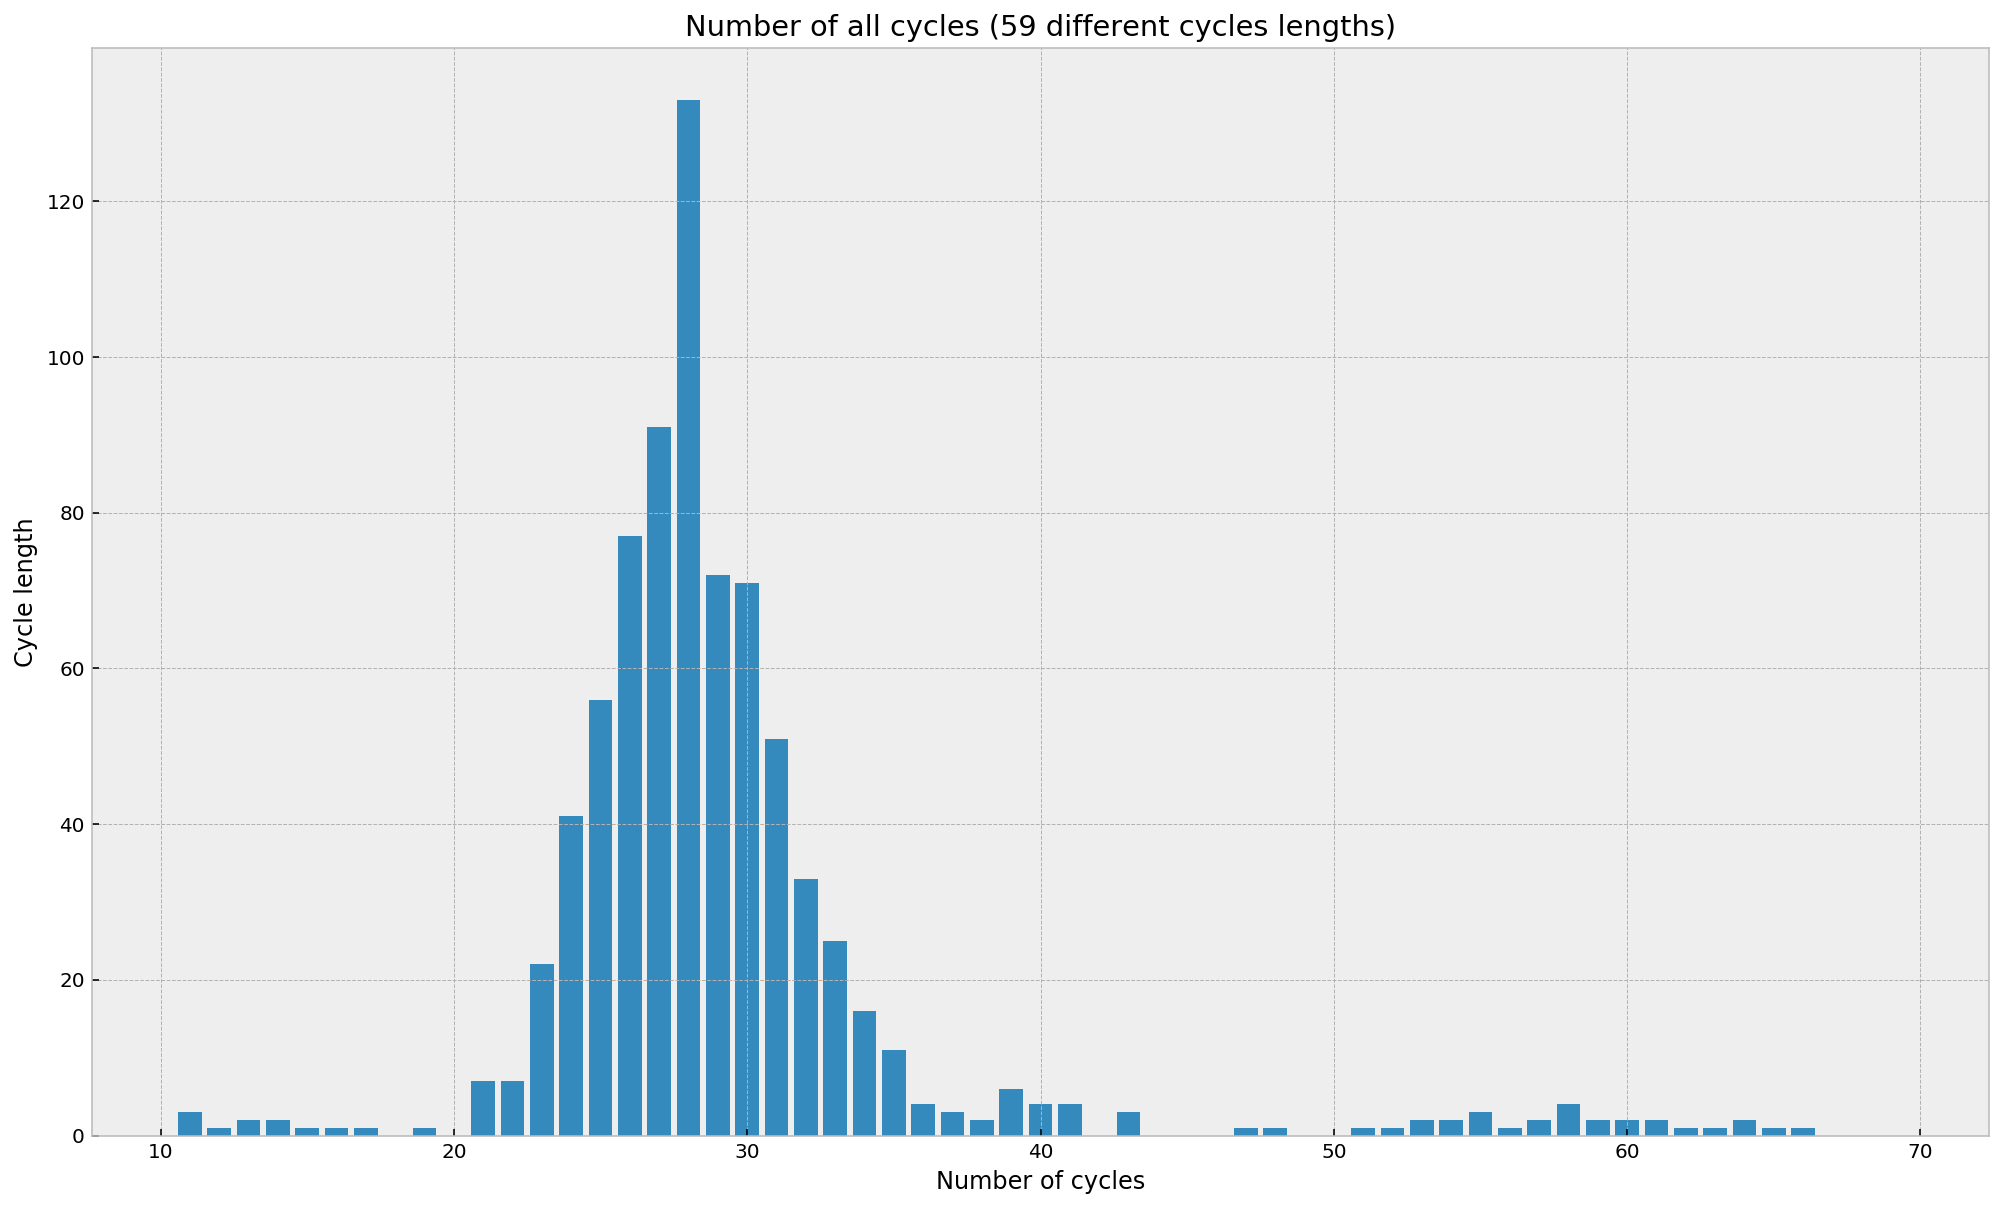

In [11]:
print("unique cycle lengths: ", sorted(df["cycle_length"].unique()))
print("number of unique cycle lengths: ", len(df["cycle_length"].unique()))
print()
print("regular cycle lengths between 20 and 36 days")
print()
### barplot
values = []
keys = []

length = sorted(df2["cycle_length"].unique())[0]
for l in sorted(df2["cycle_length"].unique()):
    #print("number of cycles with length {}: {}".format(length, len(df2[df2.cycle_length == length].cycle_index.unique())))
    values.append(len(df2[df2.cycle_length == length].cycle_index.unique()))
    keys.append(length)
    length+=1
    ## barplot!!!

with plt.style.context(('bmh')):
    fig = plt.figure(figsize = (17,10))
    plt.bar(keys, values)
    plt.xlabel("Number of cycles")
    plt.ylabel("Cycle length")
    plt.title("Number of all cycles (59 different cycles lengths)")
fig.savefig("Plots_DataExploration/cycleLengths.png")

### Dataframe with cycles of regular length only

In [12]:
df_regLen = df2.loc[(df2.cycle_length >= 20)&(df2.cycle_length <= 36)]
print("unique cycle lengths in regular df: ", sorted(df_regLen["cycle_length"].unique()))
print("number of cycles in regular df: ", len(df_regLen.groupby(["user","cycle_number"]).describe()))

unique cycle lengths in regular df:  [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
number of cycles in regular df:  717


### Dataframe with cycles of regular length only and without missing days

(if cycle_length value > count of cycle_days in one cycle)

In [13]:
groupby_cycles = df_regLen.groupby(["user","cycle_number"]).describe()
groupby_cycles

br                                             \
                   count       mean       std        min        25%   
user  cycle_number                                                    
359   1             20.0  15.611173  0.208234  15.184817  15.470119   
      2             19.0  15.572066  0.127777  15.398499  15.497297   
      3             17.0  15.013356  0.247923  14.646345  14.822556   
360   1             34.0  13.616334  0.265956  13.081668  13.527220   
      2             32.0  13.444502  0.207830  13.064451  13.293356   
      3             34.0  13.479679  0.353328  12.881180  13.217459   
      4             29.0  13.300785  0.145454  13.024383  13.198725   
      5             26.0  13.562148  0.323612  13.129790  13.289057   
      6             29.0  13.558044  0.342087  13.063932  13.225348   
      8             27.0  13.107823  0.266540  12.694011  12.861118   
      9              2.0  13.309019  0.076949  13.254608  13.281813   
395   1             16.0  12.931781  0.568800  11.836987  12.741346   
      2             16.0  12.943635  0.365712  12.608701  12.640574   
402   1             27.0  14.234641  0.353203  13.582430  13.991325   
      2             25.0  14.767164  0.283587  14.286986  14.499895   
      3             15.0  14.599174  0.211592  14.378021  14.478370   
406   2             25.0  14.412405  1.144692  11.548001  13.923742   
      4             30.0  14.931717  0.333615  14.534577  14.616049   
      5             28.0  14.838498  0.109692  14.642394  14.760067   
      6             29.0  14.897954  0.256646  14.490755  14.679297   
      7             28.0  15.058448  0.200248  14.765317  14.897097   
      8             29.0  14.783557  0.242668  14.390497  14.583629   
      9             30.0  15.292954  0.280173  14.730504  15.188189   
      10            28.0  14.915029  0.246960  14.572740  14.660158   
      11            29.0  15.131831  0.427118  14.407575  14.758985   
      12            33.0  14.969576  0.232173  14.523382  14.860100   
      13            27.0  15.030334  0.284850  14.457574  14.890559   
      14            26.0  15.174384  0.261783  14.798661  14.961927   
407   1             23.0  14.351905  0.422677  13.803525  14.032358   
      2             19.0  14.457918  0.243382  14.103776  14.235734   
...                  ...        ...       ...        ...        ...   
14026 2             28.0  14.420047  0.312143  13.722399  14.269168   
      3             26.0  14.322500  1.102070  12.181747  13.580986   
14027 1             33.0  13.233862  0.328208  12.661743  12.933723   
      2             27.0  13.257090  0.253857  12.956819  13.009666   
      3             28.0  12.856139  0.442169  12.295611  12.464522   
14032 1             32.0  17.570598  0.411251  16.991755  17.292674   
      2             32.0  16.579560  0.614710  15.452536  16.187747   
      3             29.0  15.929914  0.414536  15.423309  15.620148   
14037 1             25.0  17.264922  0.471702  16.184014  16.989399   
14055 1             27.0  18.302015  0.375447  17.549109  18.136530   
14057 1             24.0  19.743929  0.977281  16.432475  19.391021   
      2             28.0  19.336026  0.600281  17.915450  18.997772   
14059 1             22.0  17.268913  0.906481  15.419071  16.726282   
      2             30.0  16.318456  0.413888  15.628587  16.031940   
      3             28.0  16.312186  0.710556  15.144523  15.857369   
15103 2             28.0  16.786778  0.547303  15.933171  16.242242   
15104 1             24.0  13.137568  0.483880  12.094249  12.780704   
      2             26.0  13.007574  0.580113  12.097266  12.511710   
15116 1             29.0  13.796271  0.429743  13.028648  13.608762   
      2             31.0  13.761379  0.368594  13.064327  13.488029   
15556 1             29.0  11.815716  0.540888  10.808339  11.391062   
      2             23.0  11.909057  0.153706  11.586534  11.797701   
15564 1             23.0  18.779037  0.559651 

In [14]:
groupby_cycles = pd.DataFrame(groupby_cycles[["cycle_day", "cycle_length"]]).reset_index()

In [15]:
print("number of incomplete cycles (with missing days): ", len(groupby_cycles[groupby_cycles.cycle_day["count"] != groupby_cycles.cycle_length["mean"]]))

number of incomplete cycles (with missing days):  545


In [16]:
print("number of complete cycles (without missing days): ",len(groupby_cycles[groupby_cycles.cycle_day["count"] == groupby_cycles.cycle_length["mean"]]))
print("number users with complete cycles: ",len(groupby_cycles[groupby_cycles.cycle_day["count"] == groupby_cycles.cycle_length["mean"]]))
print()
print()


number of complete cycles (without missing days):  172
number users with complete cycles:  172




In [17]:
index_completeCycles = groupby_cycles[groupby_cycles.cycle_day["count"] == groupby_cycles.cycle_length["mean"]].index
gold_df = groupby_cycles.iloc[index_completeCycles][["user", "cycle_number"]]

# user and users cycles with complete data and regular cycle length
print(gold_df.user.values)
print(len(gold_df.user.unique()))
print()

[  360   360   406   406   406   406   406   406   407   407   407   407
   407   411   411   411   411   411   417   417   417   417   417   418
   418   418   418   423   423   423   423   427   427   427   436   436
   447   466   466   466   487   500   500   500   500   513   513   513
   513   513   827   827   827   827   827   912   912   917   939   939
   950   950  1316  1320  2559  2559  2560  2741  2741  2746  2746  2760
  2760  2760  2767  2787  2787  2787  2787  2787  3775  3775  3775  3994
  3994  4001  4025  4039  4039  4039  4055  4057  4070  4070  4070  4070
  4070  4070  4070  4070  4569  4569  4569  4569  4570  4577  4587  4587
  4872  4874  4874  4881  4881  4881  4919  4925  4925  4927  4927  4930
  4930  4940  4940  4940  4940  4942  4942  4942  4942  5184  5200  5200
  5203  5206  5206  5213  5214  5214  5214  5448  5448  5448  5533  5539
  5539  5547  5547  5556  5559  5559  5559  5560  5792  7959  8976 13849
 14026 14027 14027 14027 14032 14032 14057 14059 14

In [18]:
# time series data frame with complete cycles and regular length
gold = pd.DataFrame()
for user in np.unique(gold_df.user.values):
    for cycle in gold_df[gold_df.user == user].cycle_number.values:
        #print("user: ", user)
        #print("cycle: ", cycle)
        gold = gold.append(df_regLen[(df_regLen["user"] == user)&(df_regLen["cycle_number"] == cycle)])
        #print(gold[["user", "cycle_number", "date"]])

In [19]:
print("Missing values per column:")
print(gold.apply(num_missing, axis=0))

Missing values per column:
index               0
user                0
first_date          0
last_date           0
cycle_number        0
cycle_length        0
date                0
cycle_day           0
skin_temperature    0
hr                  0
br                  0
cycle_index         0
br_norm             0
hr_norm             0
st_norm             0
br_stan             0
hr_stan             0
st_stan             0
dtype: int64


In [20]:
gold.to_csv("Data/data_clean.csv")

In [21]:
gold2 = gold.reset_index()
gold2["cycle_index"] = gold2.index
cycle_index = []
i = 0
for user in gold.user.unique():
    for cycle in gold2[gold2.user == user]["cycle_number"].unique():
        #print("user: ", user)
        #print("cycle: ", cycle)
        #print(i)
        #print(len(gold2[(gold2.user == user)&(gold2.cycle_number == cycle)]))
        for j in range(len(gold2[(gold2.user == user)&(gold2.cycle_number == cycle)])):
            cycle_index.append(i)
        i +=1
#gold2.at[2]["user"] = 1
len(cycle_index)


# Set DataFrame column values based on other column values (h/t: @mlevkov)
#df.loc[(df['column1'] == some_value) & (df['column2'] == some_other_value), ['column_to_change']] = new_value

4811

In [22]:
print("Missing values per column:")
print(gold2.apply(num_missing, axis=0))
print()
print(len(gold2))
gold2["cycle_index"] = cycle_index
gold2.to_csv("Data/data_clean2.csv")

Missing values per column:
level_0             0
index               0
user                0
first_date          0
last_date           0
cycle_number        0
cycle_length        0
date                0
cycle_day           0
skin_temperature    0
hr                  0
br                  0
cycle_index         0
br_norm             0
hr_norm             0
st_norm             0
br_stan             0
hr_stan             0
st_stan             0
dtype: int64

4811


In [23]:
st_ = gold2[["cycle_day", "skin_temperature", "cycle_index"]]
hr_ = gold2[["cycle_day", "hr", "cycle_index"]]
br_ = gold2[["cycle_day", "br", "cycle_index"]]
st = st_.pivot_table(index = "cycle_day", columns="cycle_index", values = "skin_temperature").fillna(0)
hr = hr_.pivot_table(index = "cycle_day", columns="cycle_index", values = "hr").fillna(0)
br = br_.pivot_table(index = "cycle_day", columns="cycle_index", values = "br").fillna(0)

st.to_csv("Data/st.csv")
br.to_csv("Data/br.csv")
hr.to_csv("Data/hr.csv")



In [24]:
st_na = st_.pivot_table(index = "cycle_day", columns="cycle_index", values = "skin_temperature")
hr_na = hr_.pivot_table(index = "cycle_day", columns="cycle_index", values = "hr")
br_na = br_.pivot_table(index = "cycle_day", columns="cycle_index", values = "br")

st_na.to_csv("Data/st_na.csv")
br_na.to_csv("Data/br_na.csv")
hr_na.to_csv("Data/hr_na.csv")

## Feature engineering

In [25]:
gold2[gold2.cycle_index == 14]

,level_0,index,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br,cycle_index,br_norm,hr_norm,st_norm,br_stan,hr_stan,st_stan
391,1453,1456,411,2017-04-28,2017-05-25,6,28,2017-04-28,1,35.876378,54.548024,18.453927,14,-0.220427,1.239904,1.432192,0.335359,0.486800,1.000000
392,1454,1457,411,2017-04-28,2017-05-25,6,28,2017-04-29,2,35.818006,54.291054,18.628052,14,0.453682,1.000170,1.173534,0.518713,0.438095,0.930287
393,1455,1458,411,2017-04-28,2017-05-25,6,28,2017-04-30,3,35.828854,57.255691,19.085116,14,2.223160,3.765962,1.221604,1.000000,1.000000,0.943243
394,1456,1459,411,2017-04-28,2017-05-25,6,28,2017-05-01,4,35.643253,54.990854,18.957463,14,1.728963,1.653033,0.399175,0.865582,0.570732,0.721583
395,1457,1460,411,2017-04-28,2017-05-25,6,28,2017-05-02,5,35.608301,53.022412,18.790081,14,1.080961,-0.183382,0.244298,0.689329,0.197641,0.679841
396,1458,1461,411,2017-04-28,2017-05-25,6,28,2017-05-03,6,35.449440,52.409483,18.600714,14,0.347847,-0.755200,-0.459642,0.489926,0.081469,0.490117
397,1459,1462,411,2017-04-28,2017-05-25,6,28,2017-05-04,7,35.434223,52.723956,18.407384,14,-0.400610,-0.461819,-0.527072,0.286351,0.141073,0.471943
398,1460,1463,411,2017-04-28,2017-05-25,6,28,2017-05-05,8,35.375799,52.540574,18.216084,14,-1.141211,-0.632902,-0.785959,0.084912,0.106316,0.402168
399,1461,1464,411,2017-04-28,2017-05-25,6,28,2017-05-06,9,35.314359,52.826427,18.142338,14,-1.426711,-0.366222,-1.058206,0.007258,0.160495,0.328793
400,1462,1465,411,2017-04-28,2017-05-25,6,28,2017-05-07,10,35.312308,53.631105,18.630929,14,0.464821,0.384485,-1.067298,0.521743,0.313011,0.326343


### Find all cycles with same length and choose randomly five to plot


21
[21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


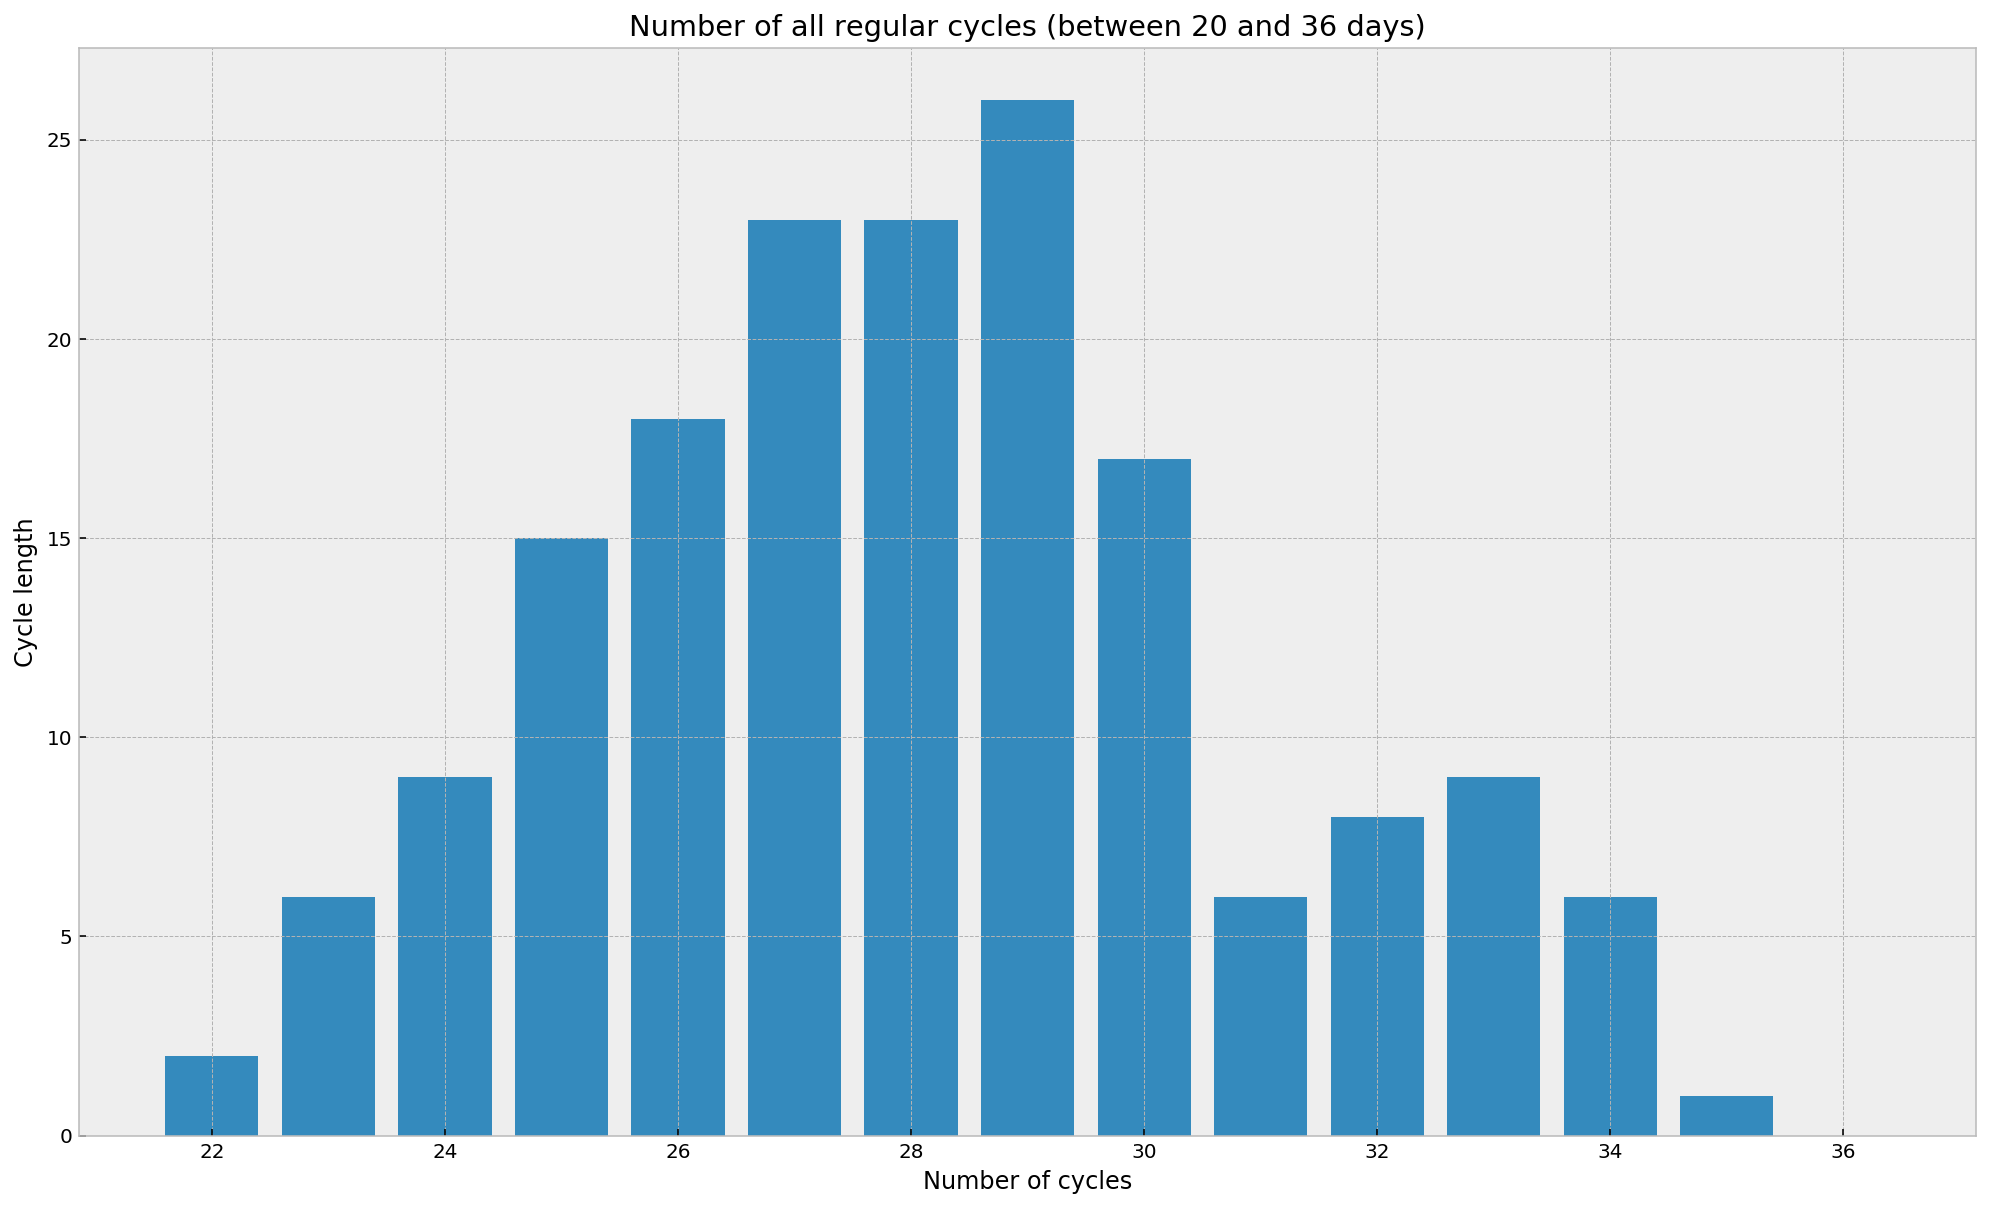

In [26]:
keys = []
values = []
length = sorted(gold2["cycle_length"].unique())[0]
print(length)
print(sorted(gold2["cycle_length"].unique()))
for l in sorted(gold2["cycle_length"].unique()):
    #print("number of cycles with length {}: {}".format(l, len(gold2[gold2.cycle_length == l].cycle_index.unique())))
    #print("length: ", l)
    #print("l: ", l)
    l+=1
    
    ## barplot!
    values.append(len(gold2[gold2.cycle_length == l].cycle_index.unique()))
    keys.append(l)
with plt.style.context(('bmh')):
    fig = plt.figure(figsize = (17,10))
    plt.bar(keys, values)
    
    plt.xlabel("Number of cycles")
    plt.ylabel("Cycle length")
    plt.title("Number of all regular cycles (between 20 and 36 days)")
fig.savefig("Plots_DataExploration/cycleLengthsRegular.png")

#print(keys)
#print(values)


In [27]:
lShort = 24
lReg = 28
lLong = 33

short = gold2[gold2.cycle_length == lShort]
reg = gold2[gold2.cycle_length == lReg]
long = gold2[gold2.cycle_length == lLong]
print("number of short cycles: ", len(short.cycle_index.unique()))
print("number of regular cycles: ", len(reg.cycle_index.unique()))
print("number of long cycles: ", len(long.cycle_index.unique()))

number of short cycles:  9
number of regular cycles:  23
number of long cycles:  9


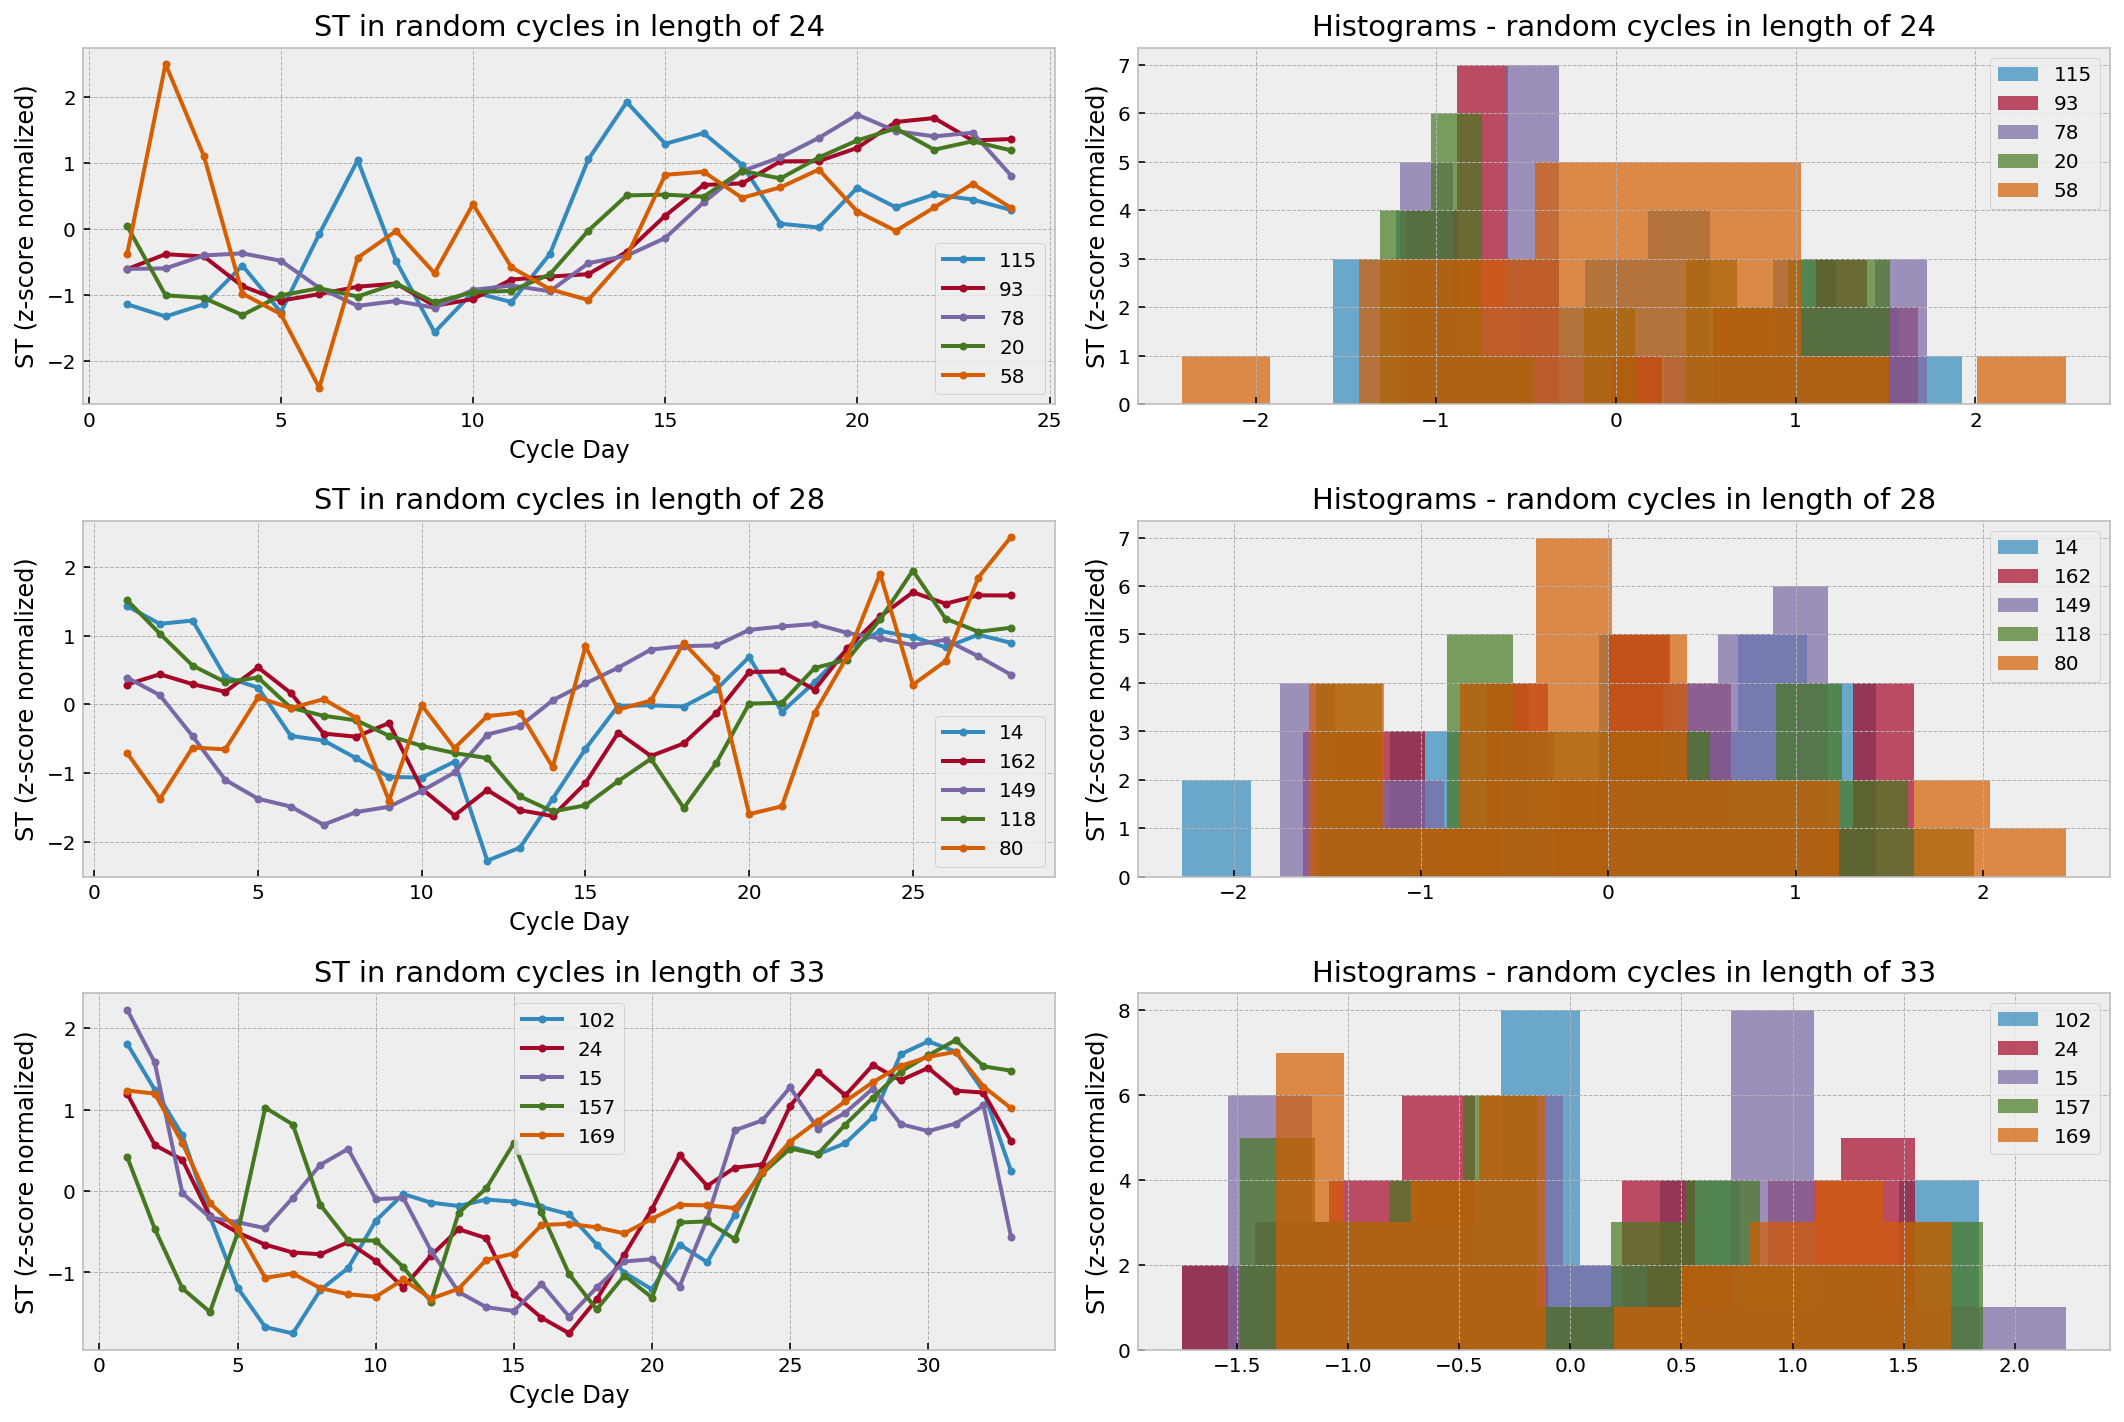

In [28]:
import random
lengths = [lShort, lReg, lLong]
i = 1
j = 2

feature = "st_norm"

bins = 10
alpha = 0.7


with plt.style.context(('bmh')):
    fig = plt.figure(figsize = (15,10))

    for l in lengths:
        #print(l)
        #print(i)
        random_cycle = gold2[gold2.cycle_length == l]
        #print(random_cycle.cycle_index.unique())
        random_index = random.sample(range(0,len(random_cycle.cycle_index.unique())), 5)
        #print(random_cycle.cycle_index.unique()[random_index])
        cycle_indexes = random_cycle.cycle_index.unique()[random_index]

        ax = fig.add_subplot(3,2,i)
        i+=2
        for cycle_index in cycle_indexes:
            #print(random_cycle[random_cycle.cycle_index == cycle_index])
            #print()
            ax.plot(random_cycle[random_cycle.cycle_index == cycle_index]["cycle_day"], random_cycle[random_cycle.cycle_index == cycle_index][feature],linestyle='-', marker = ".", label = cycle_index)
            plt.legend()
            plt.title('{} in random cycles in length of {}'.format(feature[:2].upper(), l))
        plt.xlabel('Cycle Day')
        plt.ylabel('{} (z-score normalized)'.format(feature[:2].upper()))
        
        
        
        ax = fig.add_subplot(3,2,j)
        j+=2

        plt.title('Histograms - random cycles in length of {}'.format(l))
        x0 = random_cycle[random_cycle.cycle_index == cycle_indexes[0]][feature].values
        x0 = x0[~np.isnan(x0)]
        x1 = random_cycle[random_cycle.cycle_index == cycle_indexes[1]][feature].values
        x1 = x1[~np.isnan(x1)]
        x2 = random_cycle[random_cycle.cycle_index == cycle_indexes[2]][feature].values
        x2 = x2[~np.isnan(x2)]
        x3 = random_cycle[random_cycle.cycle_index == cycle_indexes[3]][feature].values
        x3 = x3[~np.isnan(x3)]
        x4 = random_cycle[random_cycle.cycle_index == cycle_indexes[4]][feature].values
        x4 = x4[~np.isnan(x4)]
        
        plt.hist(x0, label = str(cycle_indexes[0]), bins = bins, alpha = alpha)
        plt.hist(x1, label = str(cycle_indexes[1]), bins = bins, alpha = alpha)
        plt.hist(x2,  label = str(cycle_indexes[2]), bins = bins, alpha = alpha)
        plt.hist(x3,  label = str(cycle_indexes[3]), bins = bins, alpha = alpha)
        plt.hist(x4,  label = str(cycle_indexes[4]), bins = bins, alpha = alpha)
        plt.legend()


        plt.xlabel('')
        plt.ylabel("{} (z-score normalized)".format(feature[:2].upper()))

        
        
        plt.tight_layout()

    fig.savefig("Plots_DataCleaning/st_norm_diffLen_6.png", dpi = 600)

In [29]:
fig.savefig("Plots_DataCleaning/br_norm_diffLen_rand4.png", dpi = 600)

TypeError: distplot() got an unexpected keyword argument 'bw'

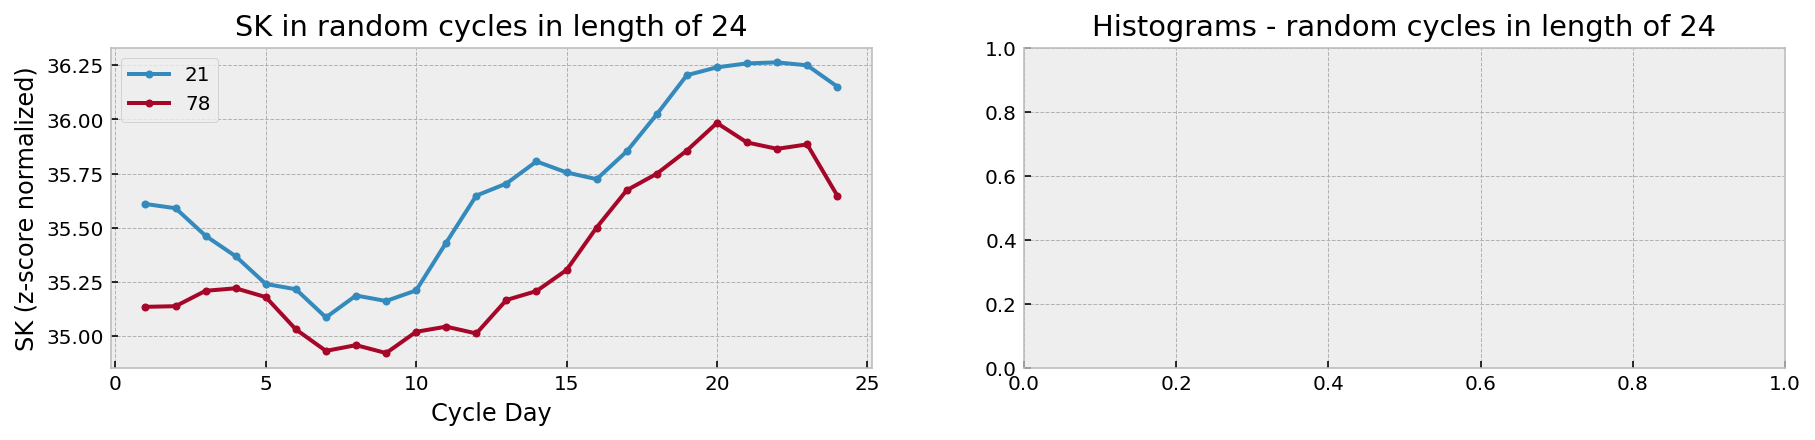

In [30]:
import random
lengths = [lShort, lReg, lLong]
i = 1
j = 2

feature = "skin_temperature"

bins = 10
alpha = 0.5


with plt.style.context(('bmh')):
    fig = plt.figure(figsize = (15,10))

    for l in lengths:
        #print(l)
        #print(i)
        random_cycle = gold2[gold2.cycle_length == l]
        #print(random_cycle.cycle_index.unique())
        random_index = random.sample(range(0,len(random_cycle.cycle_index.unique())), 2)
        #print(random_cycle.cycle_index.unique()[random_index])
        cycle_indexes = random_cycle.cycle_index.unique()[random_index]

        ax = fig.add_subplot(3,2,i)
        i+=2
        for cycle_index in cycle_indexes:
            ax.plot(random_cycle[random_cycle.cycle_index == cycle_index]["cycle_day"], random_cycle[random_cycle.cycle_index == cycle_index][feature],linestyle='-', marker = ".", label = cycle_index)
            plt.legend()
            plt.title('{} in random cycles in length of {}'.format(feature[:2].upper(), l))
        plt.xlabel('Cycle Day')
        plt.ylabel('{} (z-score normalized)'.format(feature[:2].upper()))
        
        
        
        ax = fig.add_subplot(3,2,j)
        j+=2

        plt.title('Histograms - random cycles in length of {}'.format(l))
        x0 = random_cycle[random_cycle.cycle_index == cycle_indexes[0]][feature].values
        x0 = x0[~np.isnan(x0)]
        x1 = random_cycle[random_cycle.cycle_index == cycle_indexes[1]][feature].values
        x1 = x1[~np.isnan(x1)]
        """
        x2 = random_cycle[random_cycle.cycle_index == cycle_indexes[2]][feature].values
        x2 = x2[~np.isnan(x2)]
        x3 = random_cycle[random_cycle.cycle_index == cycle_indexes[3]][feature].values
        x3 = x3[~np.isnan(x3)]
        x4 = random_cycle[random_cycle.cycle_index == cycle_indexes[4]][feature].values
        x4 = x4[~np.isnan(x4)]"""
        
        sns.distplot(x0, label = str(cycle_indexes[0]), kde = False, bw=.2).set_autoscale_on(True)
        sns.distplot(x1, label = str(cycle_indexes[1]), kde = False).set_autoscale_on(True)
        sns.distplot(x2,  label = str(cycle_indexes[2])).set_autoscale_on(True)
        sns.distplot(x3,  label = str(cycle_indexes[3])).set_autoscale_on(True)
        sns.distplot(x4,  label = str(cycle_indexes[4])).set_autoscale_on(True)
        plt.legend()


        plt.xlabel('')
        plt.ylabel("{} (z-score normalized)".format(feature[:2].upper()))
        

        
        plt.tight_layout()

    #fig.savefig("Plots_DataCleaning/Comparing_Scaling/st_norm_diffLen_1.png", dpi = 600)

In [ ]:
gold3 = gold2.drop(["level_0", "index", "user", "first_date", "last_date", "cycle_number", "date"], axis = 1)
gold4 = gold3[["hr","br","skin_temperature","cycle_index"]]
sns.pairplot(gold4[gold4.cycle_index == 14])

### try different scaling

In [ ]:
import random
lengths = [lShort, lReg, lLong]
i = 1
j = 2

bins = 10
alpha = 0.5

cycle_indexes = {lShort:[21,115,78,131,12],
                lReg:[138,162,118,80,14],
                lLong:[89,145,110,102,157]}

feature = "st_stan"

with plt.style.context(('bmh')):
    fig = plt.figure(figsize = (15,10))

    for l in lengths:
        #print(l)
        #print(i)
        random_cycle = gold2[gold2.cycle_length == l]
        #print(random_cycle.cycle_index.unique())
        #random_index = random.sample(range(0,len(random_cycle.cycle_index.unique())), 5)
        #print(random_cycle.cycle_index.unique()[random_index])

        ax = fig.add_subplot(3,2,i)
        i+=2
        for cycle_index in cycle_indexes[l]:
            #print("cycle_index", cycle_index)
            #print(random_cycle[random_cycle.cycle_index == cycle_index][feature].values)
            #print()
            ax.plot(random_cycle[random_cycle.cycle_index == cycle_index]["cycle_day"], random_cycle[random_cycle.cycle_index == cycle_index][feature],linestyle='-', marker = ".", label = cycle_index)
            #plt.legend()
            plt.title('{} in random cycles in length of {}'.format(feature.upper(), l))
        plt.xlabel('Cycle Day')
        plt.ylabel("{}".format(feature))
        #plt.ylabel('{} (z-score normalized)'.format(feature[:2].upper()))
        
        
        
        ax = fig.add_subplot(3,2,j)
        j+=2

        plt.title('Histograms - random cycles in length of {}'.format(l))
        x0 = random_cycle[random_cycle.cycle_index == cycle_indexes[l][0]][feature].values
        x0 = x0[~np.isnan(x0)]
        x1 = random_cycle[random_cycle.cycle_index == cycle_indexes[l][1]][feature].values
        x1 = x1[~np.isnan(x1)]
        x2 = random_cycle[random_cycle.cycle_index == cycle_indexes[l][2]][feature].values
        x2 = x2[~np.isnan(x2)]
        x3 = random_cycle[random_cycle.cycle_index == cycle_indexes[l][3]][feature].values
        x3 = x3[~np.isnan(x3)]
        x4 = random_cycle[random_cycle.cycle_index == cycle_indexes[l][4]][feature].values
        x4 = x4[~np.isnan(x4)]
        
        sns.distplot(x0, label = str(cycle_indexes[l][0])).set_autoscale_on(True)
        sns.distplot(x1, label = str(cycle_indexes[l][1])).set_autoscale_on(True)
        sns.distplot(x2,  label = str(cycle_indexes[l][2])).set_autoscale_on(True)
        sns.distplot(x3,  label = str(cycle_indexes[l][3])).set_autoscale_on(True)
        sns.distplot(x4,  label = str(cycle_indexes[l][4])).set_autoscale_on(True)
        plt.legend()


        plt.xlabel('')
        #plt.ylabel("{} (z-score normalized)".format(feature[:2].upper()))
        plt.ylabel("{}".format(feature))

        
        plt.tight_layout()

    fig.savefig("Plots_DataCleaning/Comparing_Scaling/st_stan_diffLen.png", dpi = 600)

### logarithmic y scale

In [ ]:
import random
lengths = [lShort, lReg, lLong]
i = 1
log_ = 1
feature = "st_norm"

bins = 10
alpha = 0.5


with plt.style.context(('bmh')):
    fig = plt.figure(figsize = (15,15))

    for l in lengths:
        #print(l)
        #print(i)
        random_cycle = gold2[gold2.cycle_length == l]
        #print(random_cycle.cycle_index.unique())
        random_index = random.sample(range(0,len(random_cycle.cycle_index.unique())), 5)
        #print(random_cycle.cycle_index.unique()[random_index])
        cycle_indexes = random_cycle.cycle_index.unique()[random_index]

        ax = fig.add_subplot(3,1,i)
        i+=1
        for cycle_index in cycle_indexes:
            feature_values = random_cycle[random_cycle.cycle_index == cycle_index][feature].values
            #print("feature values")
            #print(feature_values)
            f_min = feature_values.min()
            #print("f_min", f_min)
            feature_values = (feature_values - f_min + 1)*log_
            #print("feature values after log", feature_values)
            plt.semilogy(range(len(random_cycle[random_cycle.cycle_index == cycle_index]["cycle_day"])),feature_values,linestyle='-' ,marker = ".", label = cycle_index)
            plt.yscale("log")
            plt.legend()
            plt.title('{} in random cycles in length of {}'.format(feature[:2].upper(), l))
            log_*=10
        plt.xlabel('Cycle Day')
        plt.ylabel('{} * 10^n, z-score normalized'.format(feature[:2].upper()))
        
plt.tight_layout()

### Create Dataframe with cycles of certain length

In [32]:
from sklearn.metrics.pairwise import euclidean_distances
length = 29
cycles = gold2[gold2.cycle_length == length]
indexes = cycles.cycle_index.unique()
X = []
for index in indexes:
    X.append(cycles[cycles.cycle_index == index]["hr_norm"].values.tolist())
    #print(random_cycle.cycle_index.unique())
    #index = random.sample(range(0,len(random_cycle.cycle_index.unique())), 5)
    #print(random_cycle.cycle_index.unique()[random_index])
    #cycle_indexes = random_cycle.cycle_index.unique()[random_index]


cycles.to_csv("Data/X29.csv")

# distance between rows of X
#euclidean_distances(X, X)

In [ ]:
cycles[["cycle_day", value_st, "cycle_index"]]

In [31]:
value_st = "st_norm"
value_hr = "hr_norm"
value_br = "br_norm"

st_ = cycles[["cycle_day", value_st, "cycle_index"]]
hr_ = cycles[["cycle_day", value_hr, "cycle_index"]]
br_ = cycles[["cycle_day", value_br, "cycle_index"]]

st_29 = st_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_st)
hr_29 = hr_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_hr)
br_29 = br_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_br)

st_29.to_csv("Data/st_29_norm.csv")
br_29.to_csv("Data/br_29_norm.csv")
hr_29.to_csv("Data/hr_29_norm.csv")

NameError: name 'cycles' is not defined

In [33]:
cycles

,level_0,index,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br,cycle_index,br_norm,hr_norm,st_norm,br_stan,hr_stan,st_stan
96,565,567,406,2017-02-11,2017-03-11,6,29,2017-02-11,1,35.563302,49.198451,14.881156,3,-0.065452,1.023190,0.304007,0.478757,0.762151,0.580706
97,566,568,406,2017-02-11,2017-03-11,6,29,2017-02-12,2,35.609623,48.680272,14.958099,3,0.234350,0.743017,0.496376,0.573113,0.689523,0.641340
98,567,569,406,2017-02-11,2017-03-11,6,29,2017-02-13,3,35.495952,48.391333,15.050972,3,0.596224,0.586792,0.024305,0.687006,0.649024,0.492546
99,568,570,406,2017-02-11,2017-03-11,6,29,2017-02-14,4,35.508462,47.956509,15.056546,3,0.617942,0.351688,0.076259,0.693841,0.588079,0.508921
100,569,571,406,2017-02-11,2017-03-11,6,29,2017-02-15,5,35.460924,47.128106,15.071107,3,0.674678,-0.096219,-0.121163,0.711697,0.471968,0.446695
101,570,572,406,2017-02-11,2017-03-11,6,29,2017-02-16,6,35.431218,46.274835,14.997775,3,0.388946,-0.557571,-0.244528,0.621769,0.352372,0.407811
102,571,573,406,2017-02-11,2017-03-11,6,29,2017-02-17,7,35.293614,45.888742,14.928332,3,0.118365,-0.766327,-0.815992,0.536609,0.298257,0.227689
103,572,574,406,2017-02-11,2017-03-11,6,29,2017-02-18,8,35.222904,45.037203,14.843286,3,-0.213009,-1.226743,-1.109646,0.432316,0.178904,0.135131
104,573,575,406,2017-02-11,2017-03-11,6,29,2017-02-19,9,35.229098,44.614647,14.772826,3,-0.487552,-1.455214,-1.083924,0.345909,0.119677,0.143239
105,574,576,406,2017-02-11,2017-03-11,6,29,2017-02-20,10,35.181982,43.760795,14.687718,3,-0.819168,-1.916880,-1.279595,0.241540,0.000000,0.081564


In [34]:
gold2

,level_0,index,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br,cycle_index,br_norm,hr_norm,st_norm,br_stan,hr_stan,st_stan
0,56,56,360,2016-09-08,2016-10-11,1,34,2016-09-08,1,35.160000,49.382901,13.548148,0,-0.256382,0.474541,1.057628,0.413055,0.472952,0.926237
1,57,57,360,2016-09-08,2016-10-11,1,34,2016-09-09,2,33.990000,48.226595,13.886310,0,1.015113,-0.080389,-1.488611,0.712489,0.319647,0.402712
2,58,58,360,2016-09-08,2016-10-11,1,34,2016-09-10,3,34.460000,46.629602,13.830592,0,0.805613,-0.846811,-0.465762,0.663153,0.107915,0.613017
3,59,59,360,2016-09-08,2016-10-11,1,34,2016-09-11,4,33.090000,51.724209,14.211006,0,2.235978,1.598171,-3.447256,1.000000,0.783365,0.000000
4,60,60,360,2016-09-08,2016-10-11,1,34,2016-09-12,5,34.863000,49.416004,13.733557,0,0.440762,0.490427,0.411275,0.577231,0.477340,0.793342
5,61,61,360,2016-09-08,2016-10-11,1,34,2016-09-13,6,35.170000,45.815645,13.990477,0,1.406782,-1.237442,1.079391,0.804726,0.000000,0.930712
6,62,62,360,2016-09-08,2016-10-11,1,34,2016-09-14,7,34.168101,46.147938,13.688630,0,0.271835,-1.077969,-1.101014,0.537449,0.044056,0.482405
7,63,63,360,2016-09-08,2016-10-11,1,34,2016-09-15,8,34.429740,46.281750,13.746961,0,0.491159,-1.013750,-0.531617,0.589100,0.061797,0.599477
8,64,64,360,2016-09-08,2016-10-11,1,34,2016-09-16,9,35.053577,46.002524,13.720900,0,0.393172,-1.147755,0.826022,0.566024,0.024777,0.878617
9,65,65,360,2016-09-08,2016-10-11,1,34,2016-09-17,10,35.014793,46.617354,13.607724,0,-0.032375,-0.852689,0.741619,0.465809,0.106292,0.861263


In [37]:
value_st = "st_norm"
value_hr = "hr_norm"
value_br = "br_norm"

st_ = gold2[["cycle_day", value_st, "cycle_index"]]
hr_ = gold2[["cycle_day", value_hr, "cycle_index"]]
br_ = gold2[["cycle_day", value_br, "cycle_index"]]

st_all = st_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_st).fillna(0)
hr_all = hr_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_hr).fillna(0)
br_all = br_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_br).fillna(0)

st_all.to_csv("Data/st_all_norm.csv")
br_all.to_csv("Data/br_all_norm.csv")
hr_all.to_csv("Data/hr_all_norm.csv")

In [38]:
st_all

cycle_index,0,1,2,3,4,5,6,7,8,9,...,162,163,164,165,166,167,168,169,170,171
cycle_day,,,,,,,,,,,,,,,,,,,,,
1,1.057628,0.450432,0.383069,0.304007,1.081432,1.614788,-1.879567,0.411899,0.371881,1.551014,...,0.288933,-0.185946,0.234360,-0.553247,0.835877,1.430306,-0.317197,1.234875,0.068400,-2.427250
2,-1.488611,0.013433,-0.246418,0.496376,1.001593,1.346144,-1.608287,-0.140591,-0.227835,1.211111,...,0.438955,0.599539,-1.041038,-0.088512,0.847497,0.467011,1.398498,1.198117,0.733676,1.115414
3,-0.465762,-0.073063,-0.744378,0.024305,0.691303,0.403167,-1.855060,-0.312592,-0.539878,0.915448,...,0.294742,-2.542400,-0.999527,-0.350838,-0.477458,0.341444,-2.444091,0.591676,0.733676,0.965724
4,-3.447256,-0.557465,-1.541617,0.076259,0.230335,-0.557510,-1.006586,-0.123672,-0.828665,0.378685,...,0.182993,-0.938702,-1.157133,-0.721547,-0.389403,1.430306,-1.380644,-0.147992,-1.291077,0.965724
5,0.411275,-0.727045,-1.802345,-0.121163,-0.450880,-1.156906,-1.826849,-0.391700,-1.068223,-0.032312,...,0.538979,0.566811,-1.924106,-0.730095,-0.097141,-0.214570,-0.317197,-0.467546,-0.082878,-0.132003
6,1.079391,-0.638447,-1.641628,-0.244528,-0.798203,-1.810377,-0.969230,-0.345020,-1.590221,-0.123226,...,0.165844,-0.185946,-1.584525,-1.366349,-0.843739,0.341444,0.347458,-1.066790,0.068400,-1.129936
7,-1.101014,-0.678875,-1.785956,-0.815992,-0.842162,-1.509774,-0.445847,-0.962638,-1.296950,-0.247193,...,-0.426011,-0.276105,-1.506777,-1.591429,-0.678759,-1.019434,-1.094058,-1.013285,-1.110130,-1.205541
8,-0.531617,-0.903566,-0.916171,-1.109646,-1.167731,-1.314292,-0.285675,-1.121717,-1.220225,0.010513,...,-0.471577,-0.842594,-2.100044,-1.585771,-0.331573,-1.436590,-0.848431,-1.193461,-0.388967,-1.320608
9,0.826022,-1.321820,-0.934022,-1.083924,-1.336873,-0.859170,0.172337,-0.672687,-0.634187,-0.199621,...,-0.272056,-2.159629,-0.655272,-0.996747,-1.594174,-0.414849,-0.400506,-1.268114,-0.943936,0.102508
